In [1]:
# https://deeplearningcourses.com/c/data-science-natural-language-processing-in-python
# https://www.udemy.com/data-science-natural-language-processing-in-python

# Author: http://lazyprogrammer.me
# from __future__ import print_function, division
# from future.utils import iteritems
# from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from wordcloud import WordCloud

In [2]:
# data from:
# https://www.kaggle.com/uciml/sms-spam-collection-dataset
# file contains some invalid chars
# depending on which version of pandas you have
# an error may be thrown
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [4]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [5]:
# rename columns to something better
df.columns = ['labels', 'data']

In [6]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [7]:
df.head(3)

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1


In [8]:
# try multiple ways of calculating features
# tfidf = TfidfVectorizer(decode_error='ignore')
# X = tfidf.fit_transform(df['data'])

count_vectorizer = CountVectorizer(decode_error='ignore')
X = count_vectorizer.fit_transform(df['data'])

In [9]:
X.data    # Q -  how to see the effect of CountVectorization ?

array([1, 1, 1, ..., 2, 1, 1], dtype=int64)

In [10]:
X[:3, :]

<3x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 46 stored elements in Compressed Sparse Row format>

In [11]:
# split up the data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)

In [12]:
# create the model, train it, print scores
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))
# exit()

train score: 0.9930350924189659
test score: 0.9853181076672104


In [13]:
# see what we're getting wrong
df['predictions'] = model.predict(X)

In [14]:
df.head(6)

,labels,data,b_labels,predictions
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,0


In [15]:
# Just looking at df before next step
df[df['labels'] == 'spam']['data'].head()
# df.head()

2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: data, dtype: object

In [16]:
# visualize the data using WordCloud - wow !!! very useful I think !!!
# Must listen wetween 5:35 and 7:25 of S2-L13 of NLP Course for explanation
# [Essentially, WordCloud requires one long string of words - consisting of all the documents
# concatenated.]

def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '       # Note the ' ' --- very nice!
  wordcloud = WordCloud(width=600, height=400).generate(words) # Note this line and the next!
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

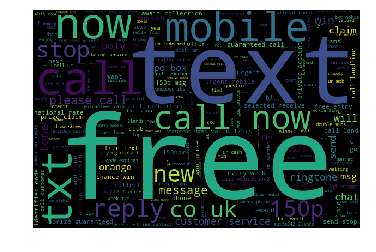

In [17]:
visualize('spam')

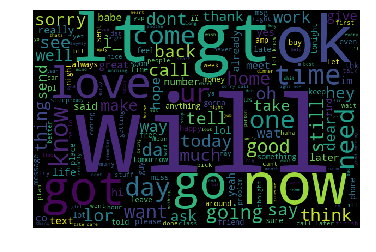

In [18]:
visualize('ham')

In [19]:
# things that should be spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
How about getting in touch with folks waiting for company? Just txt back your NAME and AGE to opt in! Enjoy the community (150p/SMS)
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09099725823 hope 2 C U Luv CLAIRE xx Callså£1/minmoremobsEMSPOBox45PO139WA
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
Hi ya babe 

In [20]:
# things that should not be spam
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)

We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Im in inperialmusic listening2the weirdest track ever byåÓleafcutter johnåÓ-sounds like insects being molested&someone plumbing,remixed by evil men on acid!
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Total video converter free download type this in google search:)
Audrie lousy autocorrect
Yavnt tried yet and never played original either
\Si.como no?!listened2the plaid album-quite gd&the new air1 which is hilarious-also boughtåÓbraindanceåÓa comp.ofstuff on aphexåÕs ;abel
Waqt se pehle or naseeb se zyada kisi ko kuch nahi milta,Zindgi wo nahi he jo hum sochte hai Zindgi wo hai jo ham jeetey hai..........
Mostly sports type..lyk footbl,crckt..
staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
\CHEERS U TEX MECAUSE U WEREBORED! YEAH OKDEN HUNNY R UIN WK SAT?SOUNDåÕS LIKEYOUR HAVIN GR8FUN J! KEEP UPDAT COUNTINLOTS OF LOVEME XXXXX.\""
Unlimited texts. Limited minutes

In [21]:
########################### End of Code ########################### 

In [22]:
# Just trying WordCloud on war and peace --- worked !!!

In [23]:
wap = open('/home/rve2/Desktop/war_and_peace.txt')

In [24]:
w = wap.read()  # this returns one long string consisting of the entire book!

In [25]:
type(w)

str

In [26]:
len(w)

3226615

In [27]:
# w2 = w.replace('\n', ' ')[:1000]

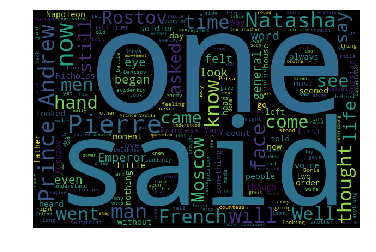

In [28]:
wc = WordCloud(width=600, height=400).generate(w)
plt.imshow(wc)
plt.axis('off')
plt.show()